In [3]:
import pandas as pd
import matplotlib.pyplot as plt #import plotting package
#render plotting automatically
%matplotlib inline
import matplotlib as mpl #additional plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high resolution figures
mpl.rcParams['font.size'] = 4 #font size for figures
from scipy import stats
import numpy as np
df = pd.read_csv(r'C:\Users\gabri\OneDrive\Documentos\Data Science Projects with Python\Chapter_1_cleaned_data.csv')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1),df['default payment next month'].values, \
                                                    test_size=0.2, random_state=24)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [6]:
np.mean(y_train)

0.223102526838873

In [7]:
np.mean(y_test)

0.21657603600225014

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, \
                                multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [10]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [11]:
y_pred = example_lr.predict(X_test)

In [12]:
is_correct = y_pred == y_test

In [13]:
np.mean(is_correct)

0.7834239639977498

In [14]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [15]:
from sklearn import metrics

In [16]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

# Exercise 2.02

In [17]:
# Number of positive samples from the test sample
P = sum(y_test)
P

1155

In [18]:
# True Positives: number of positive samples correctly predicted by the model
TP = sum((y_test==1) & (y_pred==1))
TP

0

In [19]:
TPR = TP/P
TPR

0.0

In [20]:
FN = sum((y_test==1) & (y_pred==0))
FN

1155

In [21]:
FNR = FN/P
FNR

1.0

In [22]:
N = sum(y_test==0)
N

4178

In [23]:
TN = sum((y_test==0) & (y_pred==0))
TN

4178

In [24]:
FP = sum((y_test==0) & (y_pred==1))
FP

0

In [25]:
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [26]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

# Exercise 2.03

In [27]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [28]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [29]:
prob_sum.shape

(5333,)

In [30]:
np.unique(prob_sum)

array([1.])

In [31]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

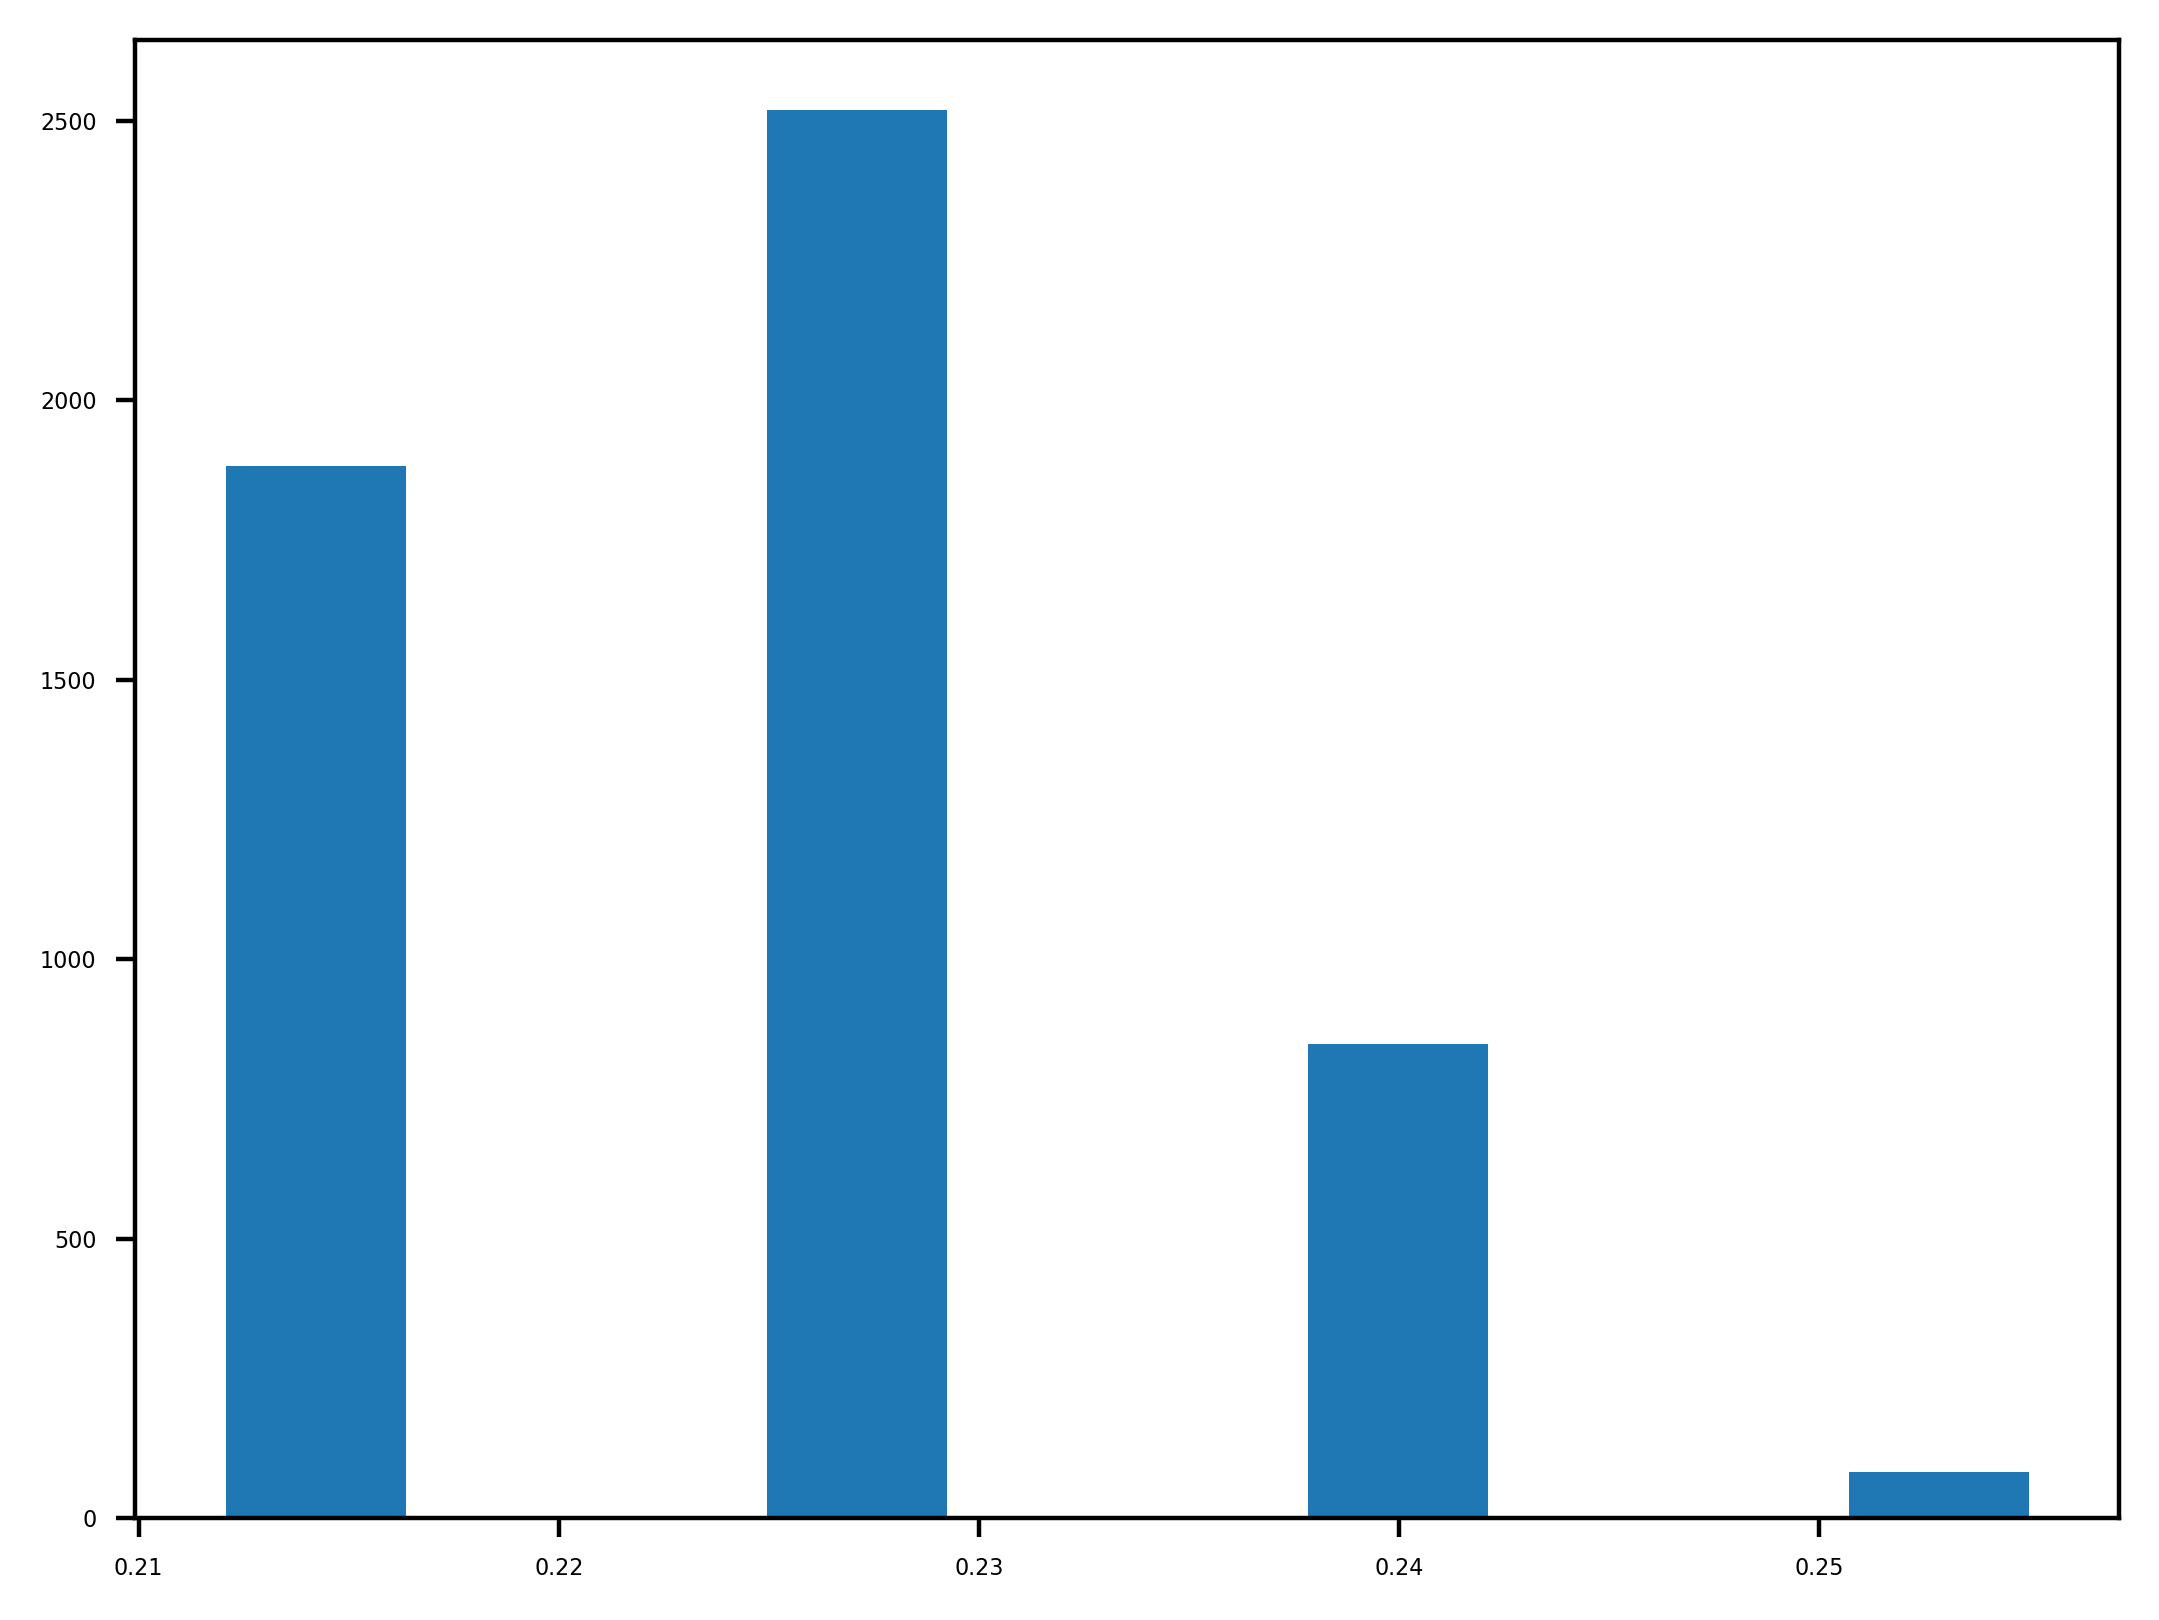

In [32]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

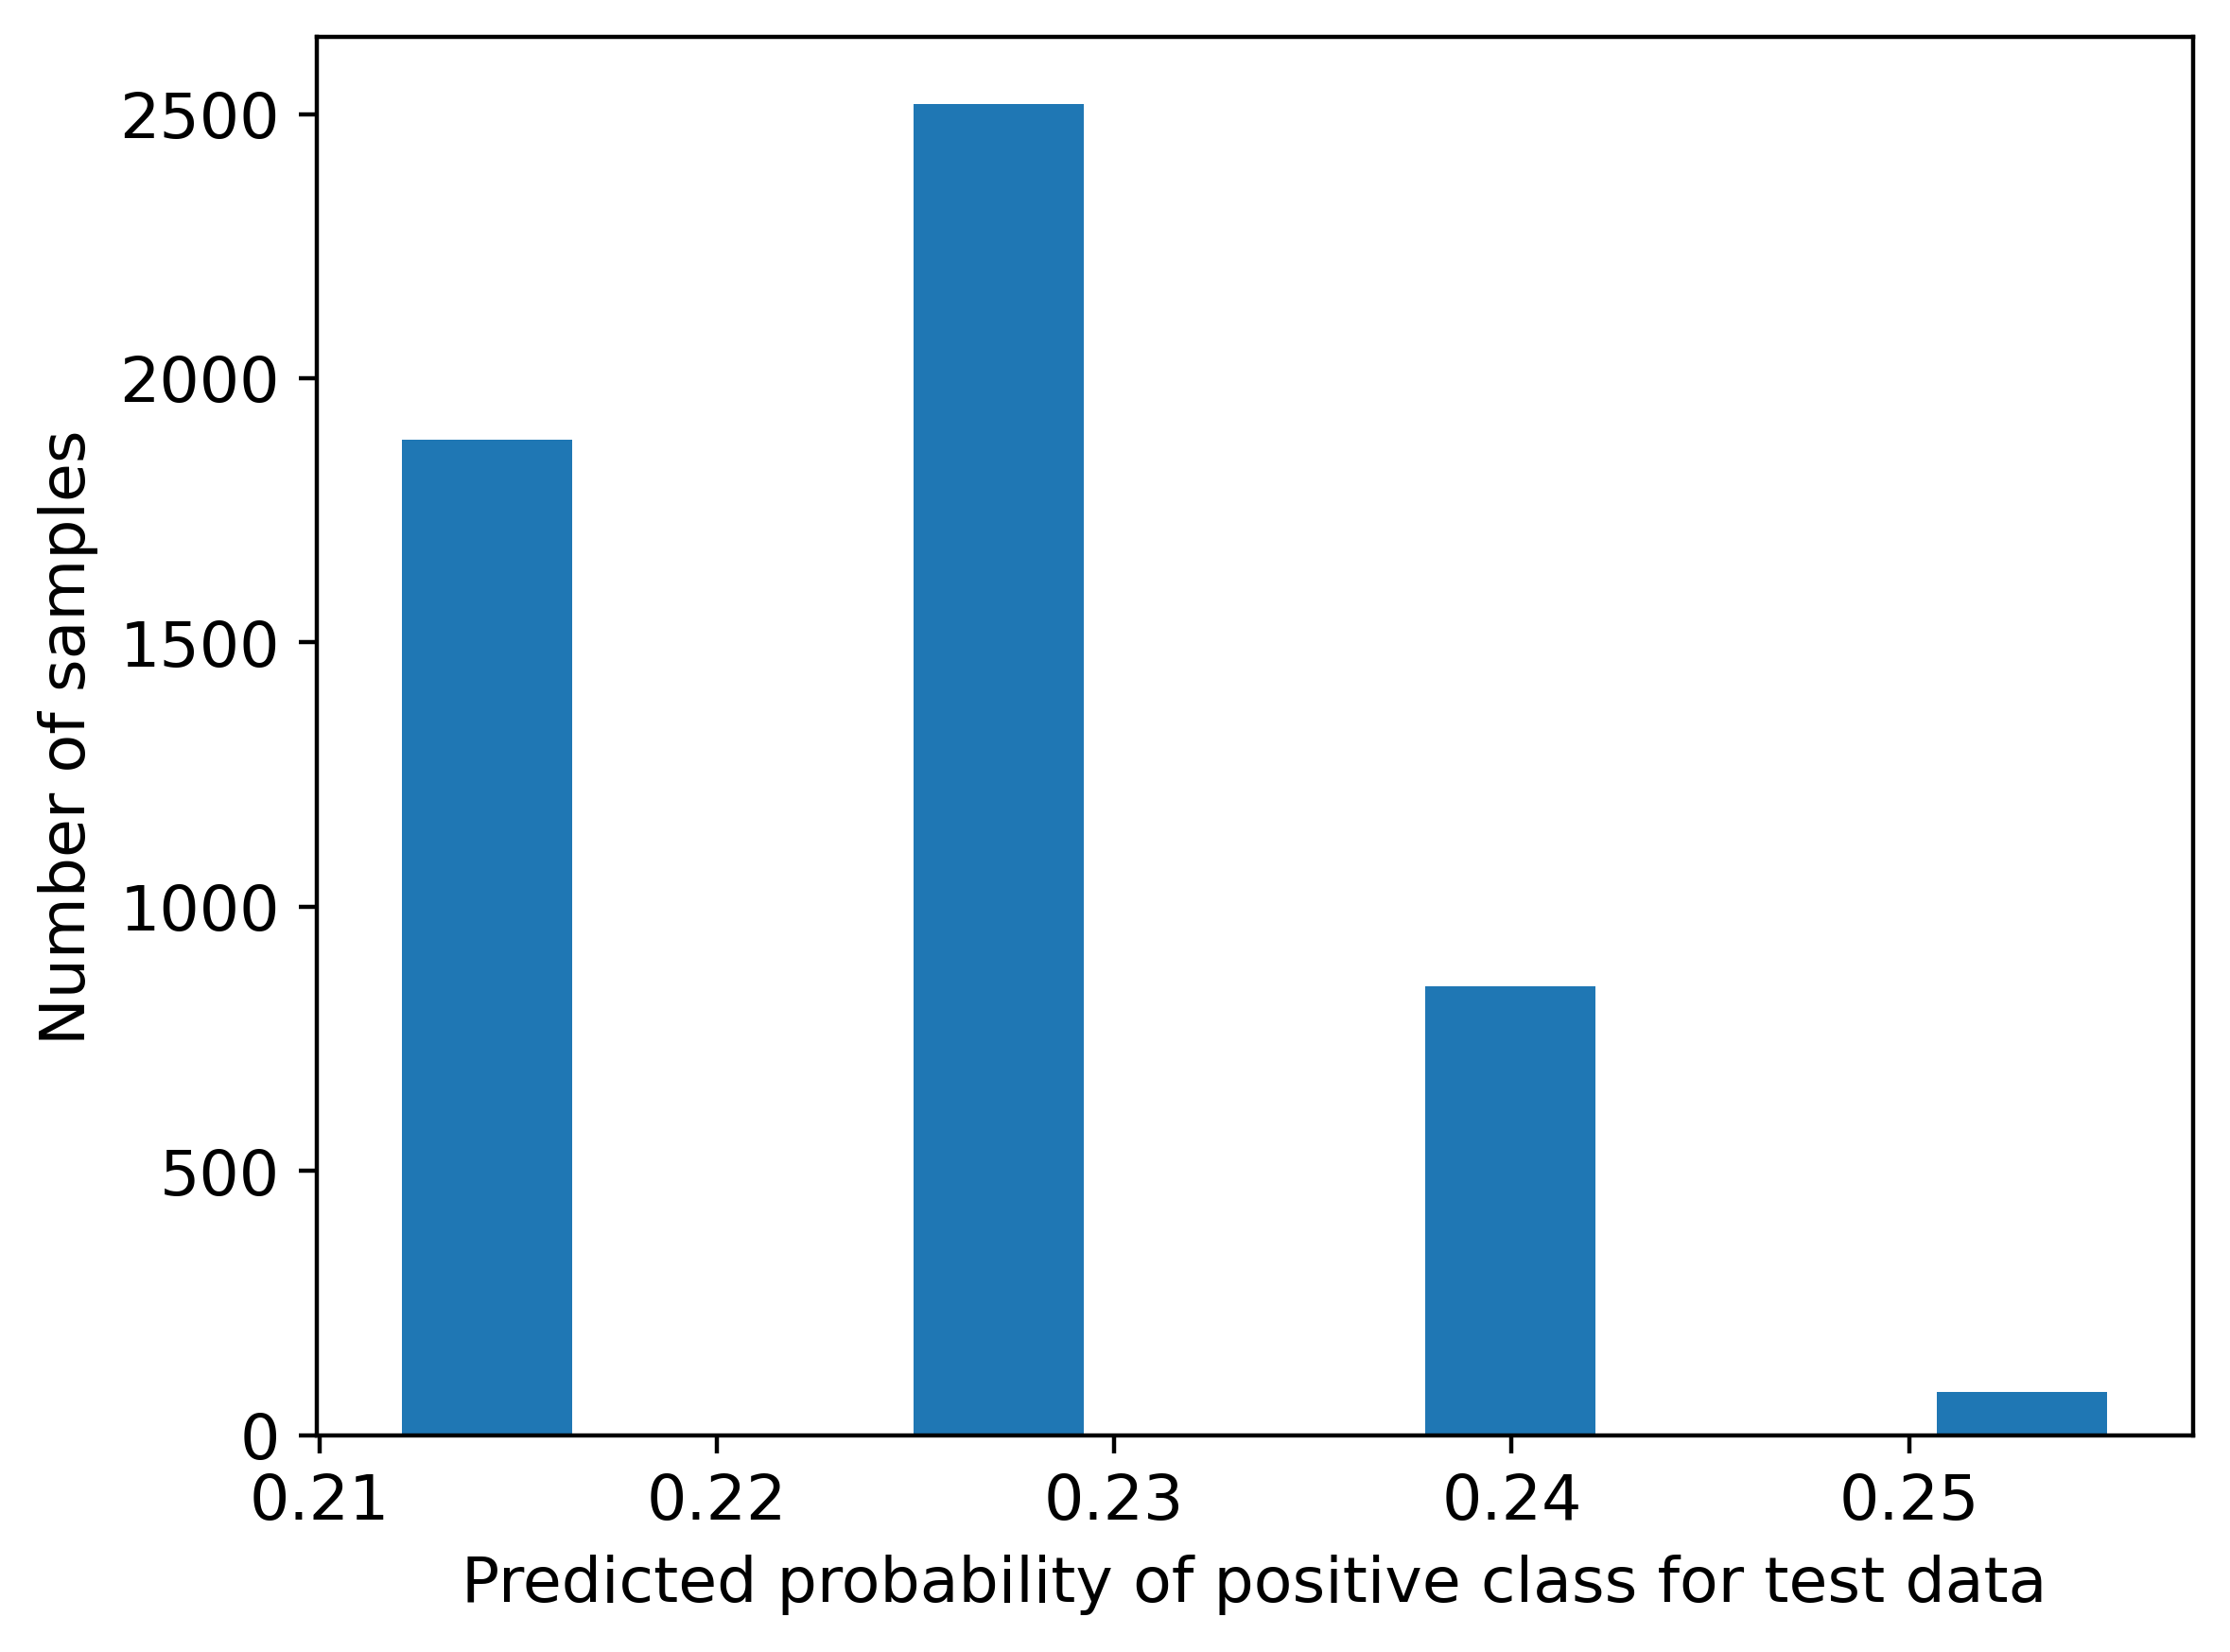

In [33]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for test data')
plt.ylabel('Number of samples')

In [34]:
df['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [35]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

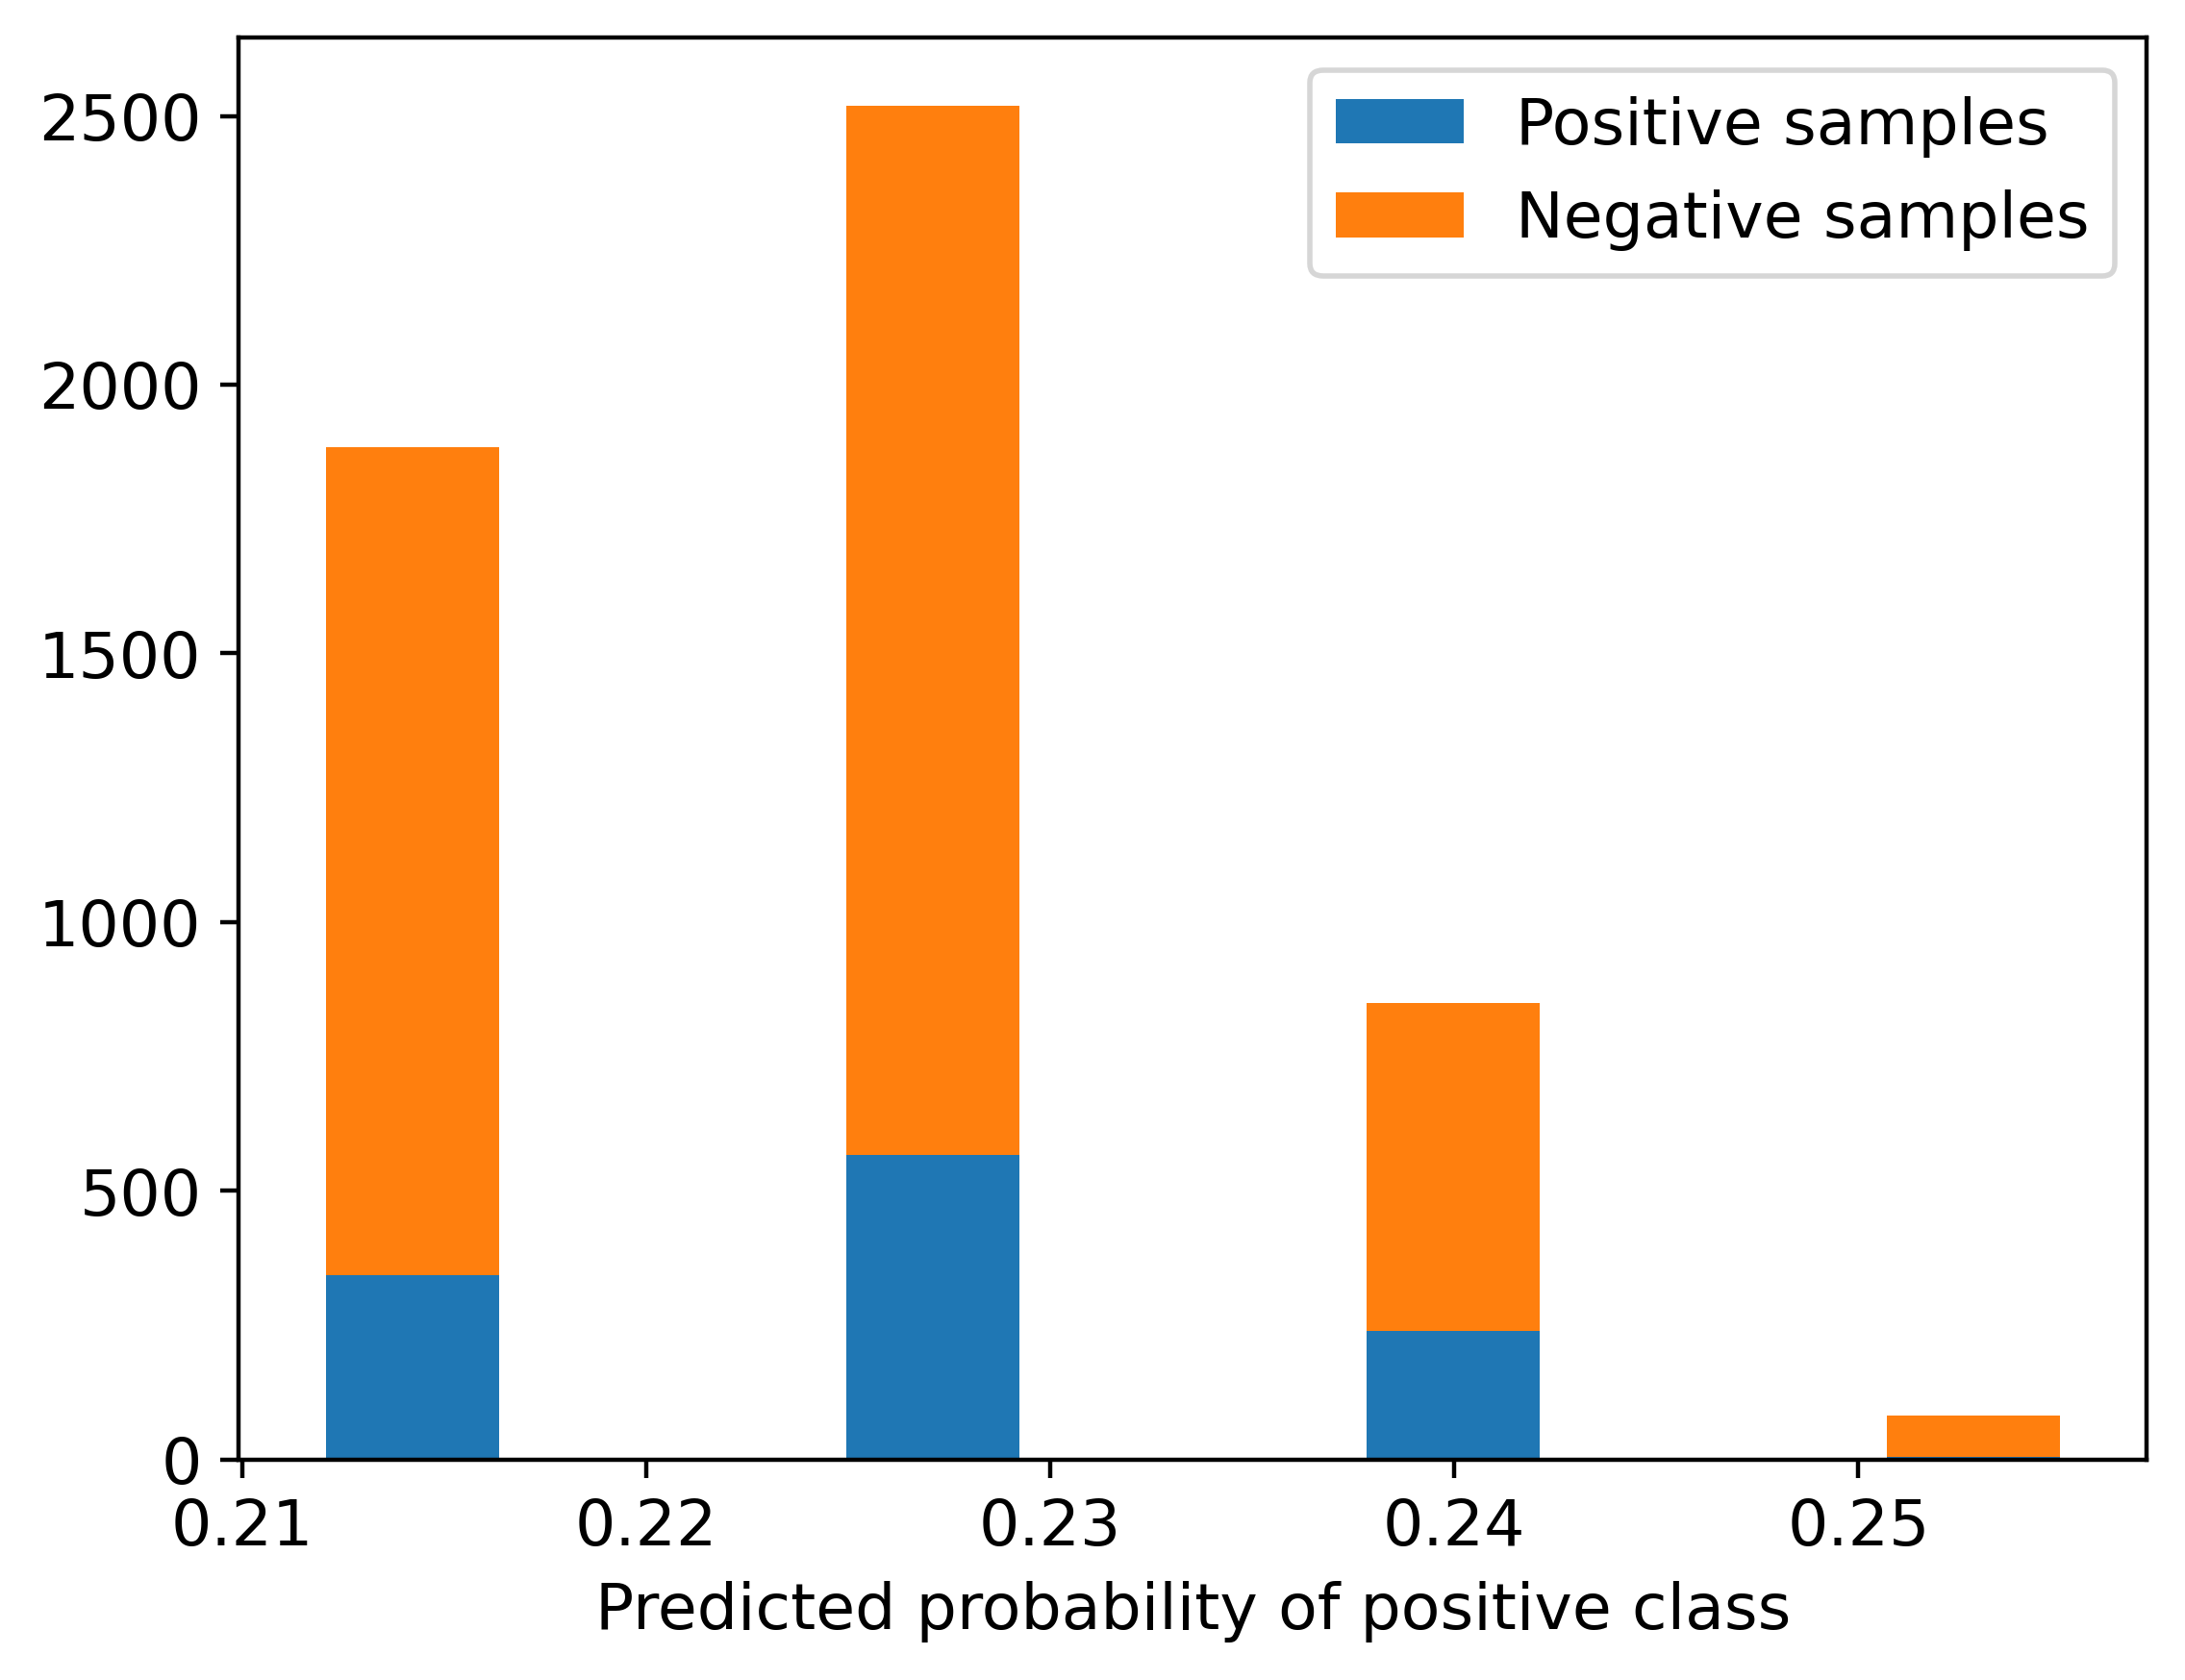

In [36]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel

# ROC Curve

In [37]:
from sklearn import metrics

In [38]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC Curve')

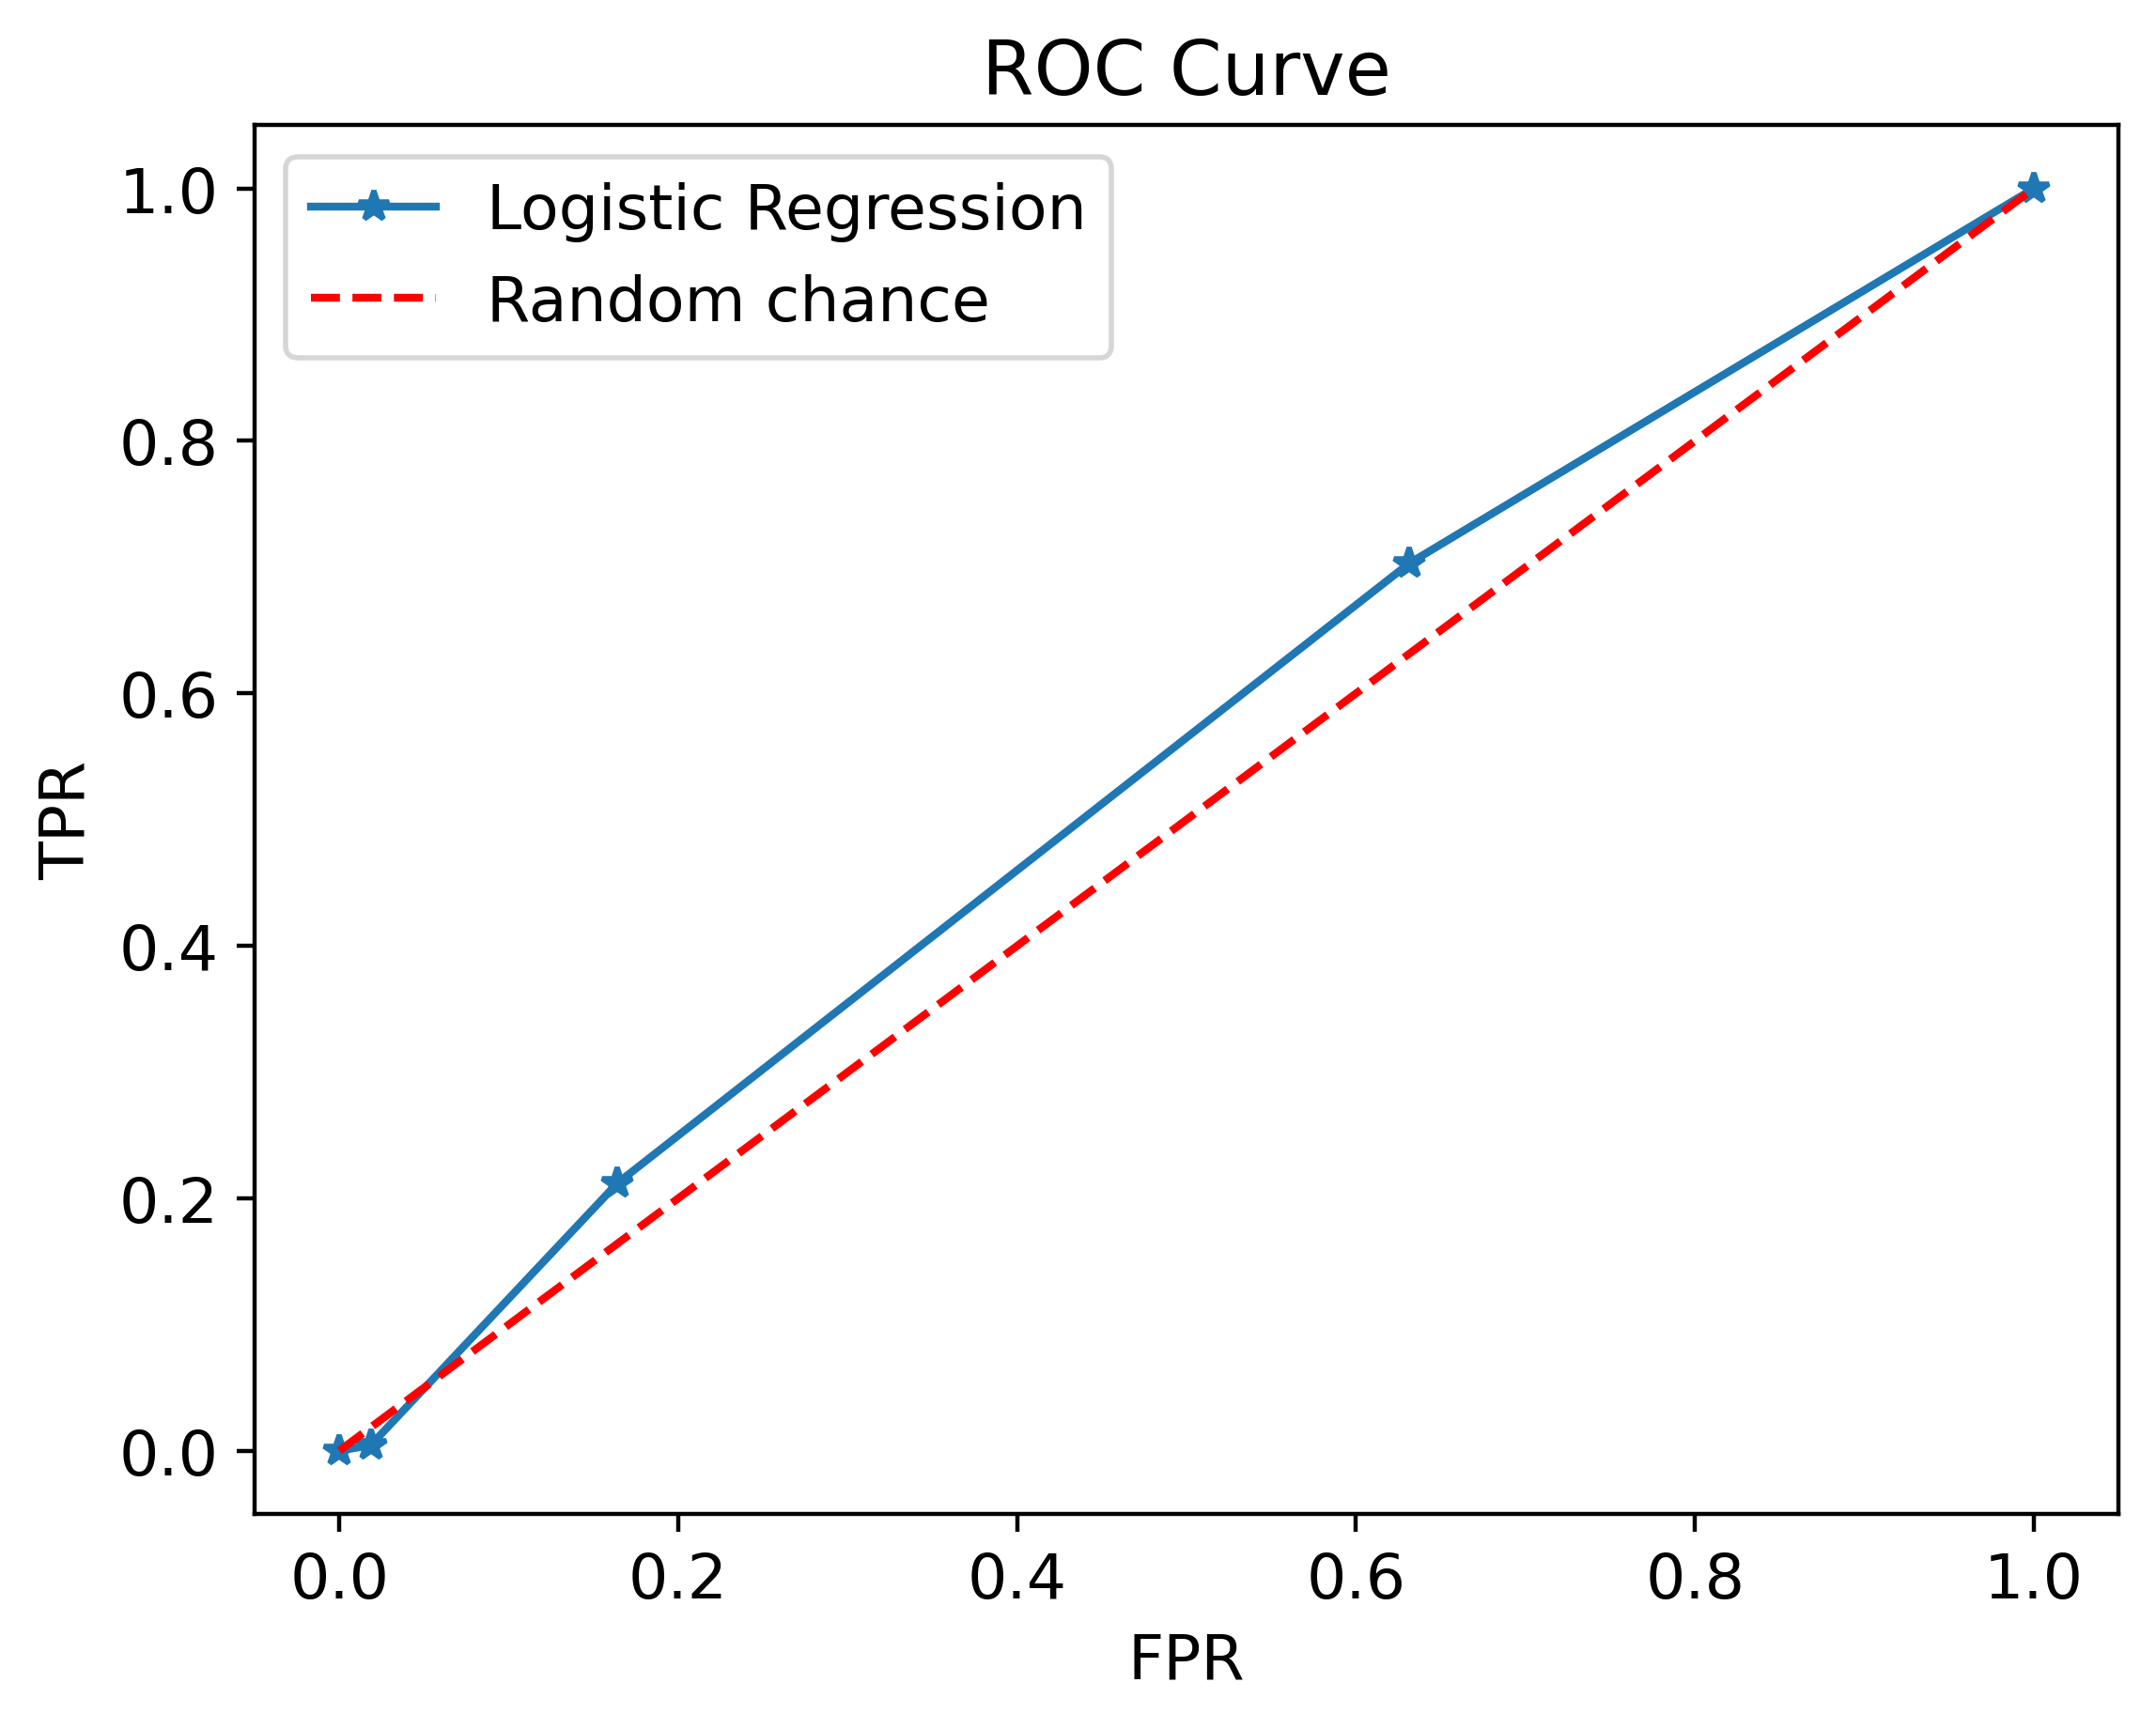

In [39]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0,1], 'r--')
plt.legend(['Logistic Regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

In [40]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [41]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642